In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('advertising.csv')

In [4]:
print(data.head(6))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2


In [5]:
print(data.tail(6))

        TV  Radio  Newspaper  Sales
194  149.7   35.6        6.0   17.3
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [7]:
# preprocessing data
X = data.drop('Sales', axis=1)  
y = data['Sales']

In [8]:
train_x, X_test,train_y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# linear Regression model
model = LinearRegression()

# Train the model
model.fit(train_x, train_y)


LinearRegression()

In [13]:
y_pred = model.predict(X_test)

Root Mean Squared Error: 1.7052146229349223


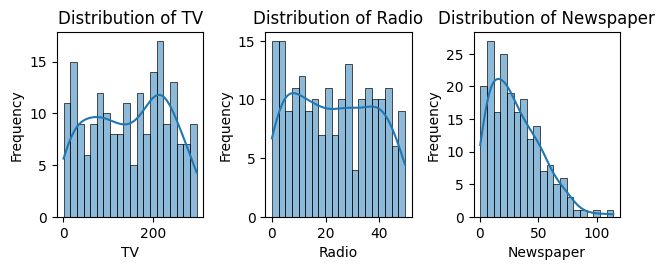

In [15]:
#  model evolution
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

#Data Visualisation
for idx, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, idx + 1)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

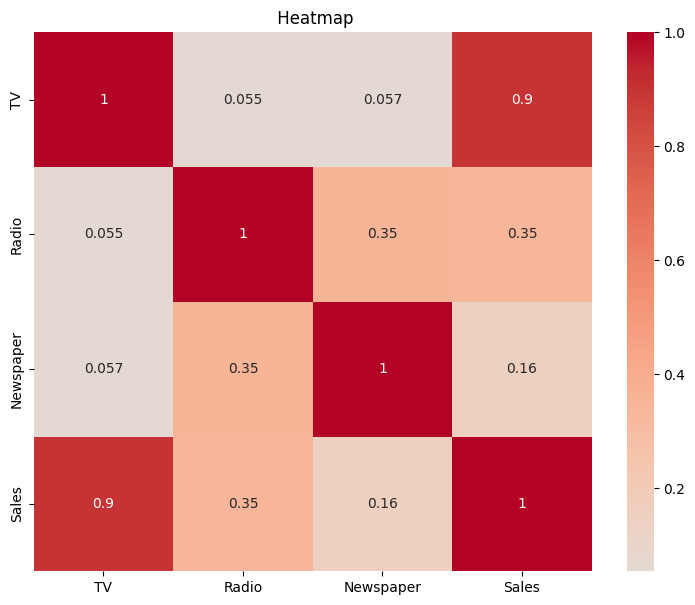

In [18]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title(' Heatmap')
plt.show()


In [20]:

# Predict using the trained model
predictions = model.predict(X_test)


In [21]:
# print prediction

print(predictions)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


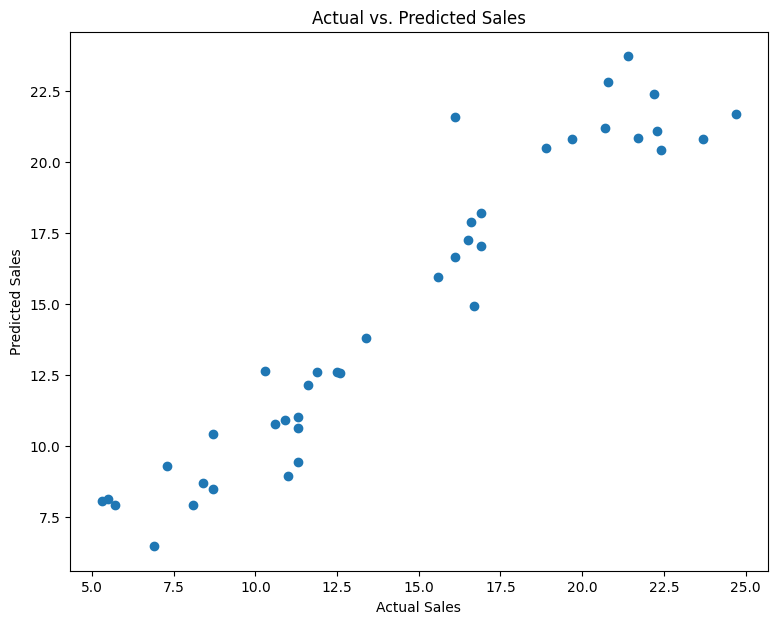

In [19]:
# Visualize  actual values vs predicted 
plt.figure(figsize=(9, 7))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()